In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.shape

(891, 12)

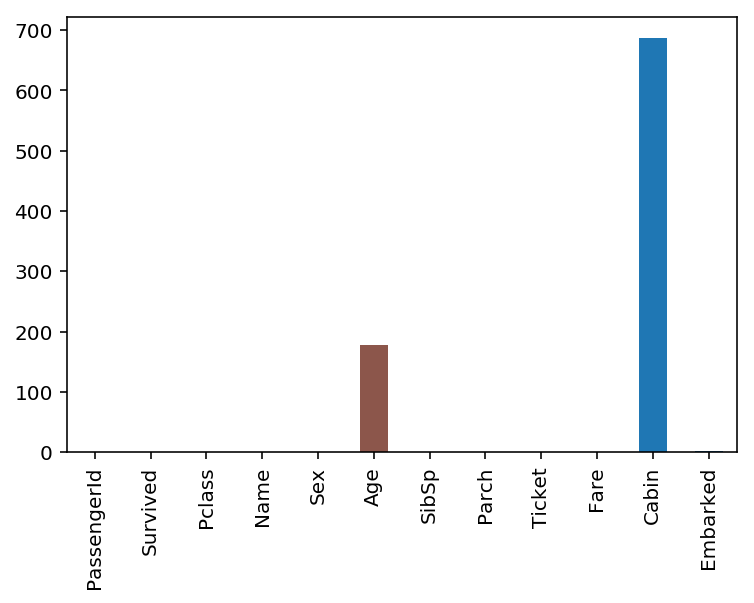

In [5]:
# display the count of null data entries per column in the form of a bar chart
train.isnull().sum().plot(kind='bar');

In [6]:
# the values for the bar chart above are listed below
# 'Cabin' has the highest count of missing values
# 'Age' has the second highest count of missing values
# 'Embarked' has 2 missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# this tells me the rows with NaN in 'Embarked' column
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
# removed the rows with NaN values in 'Embarked' column
train.drop([61, 829], inplace=True)

In [9]:
# filled all NaN values in 'Cabin' column with string
train['Cabin'].fillna(value='**¯\\_(ツ)_/¯**', inplace=True)

In [10]:
# create a new column 'FamilyCount'
# it is the sum of columns 'SibSp' and 'Parch'
train['FamilyCount'] = (train['SibSp'] + train['Parch'])

In [11]:
# look for 'reverend' in the 'Name' column
train[train['Name'].str.contains("Rev")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,**¯\_(ツ)_/¯**,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,**¯\_(ツ)_/¯**,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,**¯\_(ツ)_/¯**,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,**¯\_(ツ)_/¯**,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,**¯\_(ツ)_/¯**,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,**¯\_(ツ)_/¯**,S,0


In [12]:
# create column `IsReverend`: 'True' for preacher, 'False' if not
train['IsReverend'] = train['Name'].str.contains("Rev")

In [13]:
# get dummy variables of 'Embarked'
# put dummy variables into new columns 'Embarked_C', 'Embarked_Q', 'Embarked_S'
train[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = pd.get_dummies(
    train['Embarked'], prefix='Embarked')

In [14]:
# get dummy variables of 'Sex'
# put dummy variables into new columns 'Sex_female' and 'Sex_male'
train[['Sex_female', 'Sex_male']] = pd.get_dummies(
    train['Sex'], prefix='Sex')

BONUS: Extract the title from everyone's name and create dummy columns

In [15]:
# this is to verify that certain titles are real and not typos
train[train['Name'].str.contains('the Countess')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,0,False,0,0,1,1,0


In [16]:
# extract titles by splitting on the comma then select second half of split
# then split on the period and select first half of split
# create dummy columns and add them to new dataframe 'title_dum'
title_dum = pd.get_dummies(train['Name'
                ].str.split(', ').str[1
                ].str.split('.').str[0], prefix='Title')

In [17]:
title_dum.head(2)

,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
# find overall survival rate
# (normalize=True) changes count output to a proportion
train['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

Rates above tell us that 38% of passengers survived while 62% did not.

In [19]:
# count females who survived then divide by number of females
(train['Survived'][(train['Survived'] == 1)&(
    train['Sex_female']==1)].count())/(
    train['Sex_female'][train['Sex_female']==1].count())

0.7403846153846154

In [20]:
# count males who survived then divide by number of males
(train['Survived'][(train['Survived']==1)&(
    train['Sex_male']==1)].count())/(
    train['Sex_male'][train['Sex_male']==1].count())

0.18890814558058924

In [21]:
# count females who survived then divide by total number of passengers 
# passenger count is indicated by the number of rows/entries
(train['Survived'][(train['Survived'] == 1)&(
    train['Sex_female']==1)].count())/len(train.index)

0.25984251968503935

In [22]:
# count males who survived then divide by total number of passengers 
# passenger count is indicated by the number of rows/entries
(train['Survived'][(train['Survived'] == 1)&(
    train['Sex_male']==1)].count())/len(train.index)

0.12260967379077616

**Which gender fared the worst? What was their survival rate?**

Males fared the worst as the survival rate for males when compared to the total male population on the boat was under 19%. Females on the other hand had a survival rate of 74%, given that one was female. If you compared the survivors to the population as a whole, the males had a survival rate of 12% and the females at 26%.

In [23]:
# count number of survivors from 1st class and 
# divide by total number of 1st class passengers
(train['Pclass'][(train['Survived']==1) & (
    train['Pclass']==1)].count())/(
    train['Pclass'][train['Pclass']==1].count())

0.6261682242990654

In [24]:
# count number of survivors from 2nd class and 
# divide by total number of 2nd class passengers
(train['Pclass'][(train['Survived']==1) & (
    train['Pclass']==2)].count())/(
    train['Pclass'][train['Pclass']==2].count())

0.47282608695652173

In [25]:
# count number of survivors from 3rd class and 
# divide by total number of 3rd class passengers
(train['Pclass'][(train['Survived']==1) & (
    train['Pclass']==3)].count())/(
    train['Pclass'][train['Pclass']==1].count())

0.5560747663551402

**What was the survival rate for each `Pclass`?**

Of the first class passengers, under 63% survived. Of the second class passengers, over 47% survived. Of the third class passengers, over 55% survived.

In [26]:
# count number of reverends who survived
(train['IsReverend'][(train['IsReverend']==1) & (     #select reverends
    train['Survived']==1)].count())     #select survived

0

**Did any reverends survive? How many?**

No, none of the reverends survived.

In [27]:
# proportion of survivors in **¯\\_(ツ)_/¯** to total in **¯\\_(ツ)_/¯**
(train['Cabin'][(train['Survived']==1) & (
    train['Cabin']=='**¯\\_(ツ)_/¯**')].count())/(
    train['Cabin'][train['Cabin']=='**¯\\_(ツ)_/¯**'].count())

0.29985443959243085

In [28]:
# proportion of survivors in **¯\\_(ツ)_/¯** to total passengers
(train['Cabin'][(train['Survived']==1) & (
    train['Cabin']=='**¯\\_(ツ)_/¯**')].count())/len(train.index)

0.23172103487064116

**What is the survival rate for cabins marked **¯\\_(ツ)_/¯**?**

For those in cabins marked **¯\\_(ツ)_/¯**, the proportion of those who survived is 30%. Of all passengers, 23% survived and stayed in **¯\\_(ツ)_/¯** cabins.

In [29]:
train['Age'].mean()

29.64209269662921

In [30]:
# calculate the mean age of passengers whose age is not missing
mean_age = train['Age'].mean()

In [31]:
# replace all null values in 'Age' with mean age
train['Age'].fillna(value=mean_age, inplace=True)

In [32]:
# divide those who survived with NaN in 'Age' by those who survived
train['Age'][(train['Age']==29.64209269662921)& (
    train['Survived']==1)].count() / train['Survived'][
    train['Survived']==1].count()

0.15294117647058825

In [33]:
# divide those who survived with NaN in 'Age' by all passengers
train['Age'][(train['Age']==29.64209269662921)& (
    train['Survived']==1)].count() / train['Survived'].count()

0.05849268841394826

**What is the survival rate for people whose `Age` is empty?**

For those whose 'Age' is empty, we see that the survival rate compared to everyone who survived is 15%. When compared to the overall number of passengers, the proportion of those who survived and whose 'Age' is empty is less than 6%.

In [34]:
# survival rate for 'Embarked_C'
(train['Cabin'][(train['Survived']==1) & (
    train['Embarked_C']==1)].count())/len(train.index)

0.1046119235095613

In [35]:
# survival rate for 'Embarked_Q'
(train['Cabin'][(train['Survived']==1) & (
    train['Embarked_Q']==1)].count())/len(train.index)

0.03374578177727784

In [36]:
# survival rate for 'Embarked_S'
(train['Cabin'][(train['Survived']==1) & (
    train['Embarked_S']==1)].count())/len(train.index)

0.2440944881889764

**What is the survival rate for each port of embarkation?**

The survival rate for each port is as follows:  
Cherbourg (C) = 10%  
Queenstown (Q) = 3%  
Southampton (S) = 24%  

These percentages are calculated based on number of survivors from each port divided by the total number of passengers.

In [37]:
# calculate proportion of survival rate of children under age 12 in 'Pclass' 1
# compared to (divided by) population of child passengers under age 12
(train['Age'][(train['Age']<12) & (
    train['Pclass']==1) & (
    train['Survived']==1)].count())/(train['Age'][(train['Age']<12)].count())

0.04411764705882353

In [38]:
# calculate proportion of survival rate of children under age 12 in 'Pclass' 2
# compared to (divided by) population of child passengers under age 12
(train['Age'][(train['Age']<12) & (
    train['Pclass']==2) & (
    train['Survived']==1)].count())/(train['Age'][(train['Age']<12)].count())

0.25

In [39]:
# calculate proportion of survival rate of children under age 12 in 'Pclass' 3
# compared to (divided by) population of child passengers under age 12
(train['Age'][(train['Age']<12) & (
    train['Pclass']==3) & (
    train['Survived']==1)].count())/(train['Age'][(train['Age']<12)].count())

0.27941176470588236

**What is the survival rate for children (under 12) in each `Pclass`?**

Looking at the numbers above, we see that the survival rates of children under the age of 12 increases as the 'Pclass' number increases. So for first class, over 4% survived; second class, 25% survived; third class, under 28% survived.  

In [40]:
# look for captain of ship
# search for the letters 'Cap' in 'Name'
train[train['Name'].str.contains("Cap")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,False,0,0,1,0,1


**Did the captain of the ship survive? Is he on the list?**

Assuming we did not have any history, we might assume the Captain is on the list of passengers as shown above; he did not survive. If we Google it, we will see that Capt. Crosby is not the captain of the ship.

In [41]:
# finds the index of the highest fare of those who died
train['Fare'][train['Survived']==0].idxmax()

27

In [42]:
# locate info from row = index 27
train.iloc[27]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
FamilyCount                                 5
IsReverend                              False
Embarked_C                                  0
Embarked_Q                                  0
Embarked_S                                  1
Sex_female                                  0
Sex_male                                    1
Name: 27, dtype: object

**Of all the people that died, who had the most expensive ticket? How much did it cost?**

Of all the people who died, Mr. Charles Alexander Fortune purchased the most expensive ticket at $263.

In [43]:
# count those who survived with family
# divide by total who had families
(train['FamilyCount'][(train['FamilyCount']>0) & (
    train['Survived']==1)].count()) / (
    train['FamilyCount'][(train['FamilyCount']>0)]).count()

0.5056497175141242

In [44]:
# count those who died with family
# divide by total who had families
train['FamilyCount'][(train['FamilyCount']>0) & (
    train['Survived']==0)].count() / (
    train['FamilyCount'][(train['FamilyCount']>0)]).count()

0.4943502824858757

In [45]:
# count those who survived with no family
# divide by total with no family
train['FamilyCount'][(train['FamilyCount']==0) & (
    train['Survived']==1)].count() / (
    train['FamilyCount'][(train['FamilyCount']==0)]).count()

0.30093457943925234

In [46]:
# count those who died with no family
# divide by total with no family
train['FamilyCount'][(train['FamilyCount']==0) & (
    train['Survived']==0)].count() / (
    train['FamilyCount'][(train['FamilyCount']==0)]).count()

0.6990654205607477

**Does having family on the boat help or hurt your chances of survival?**

If you had no family, you had a 70% of dying.  
If you had family, you had a 50% chance of survival.  
So, yes, having a family does seem to help your chances of survival.

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

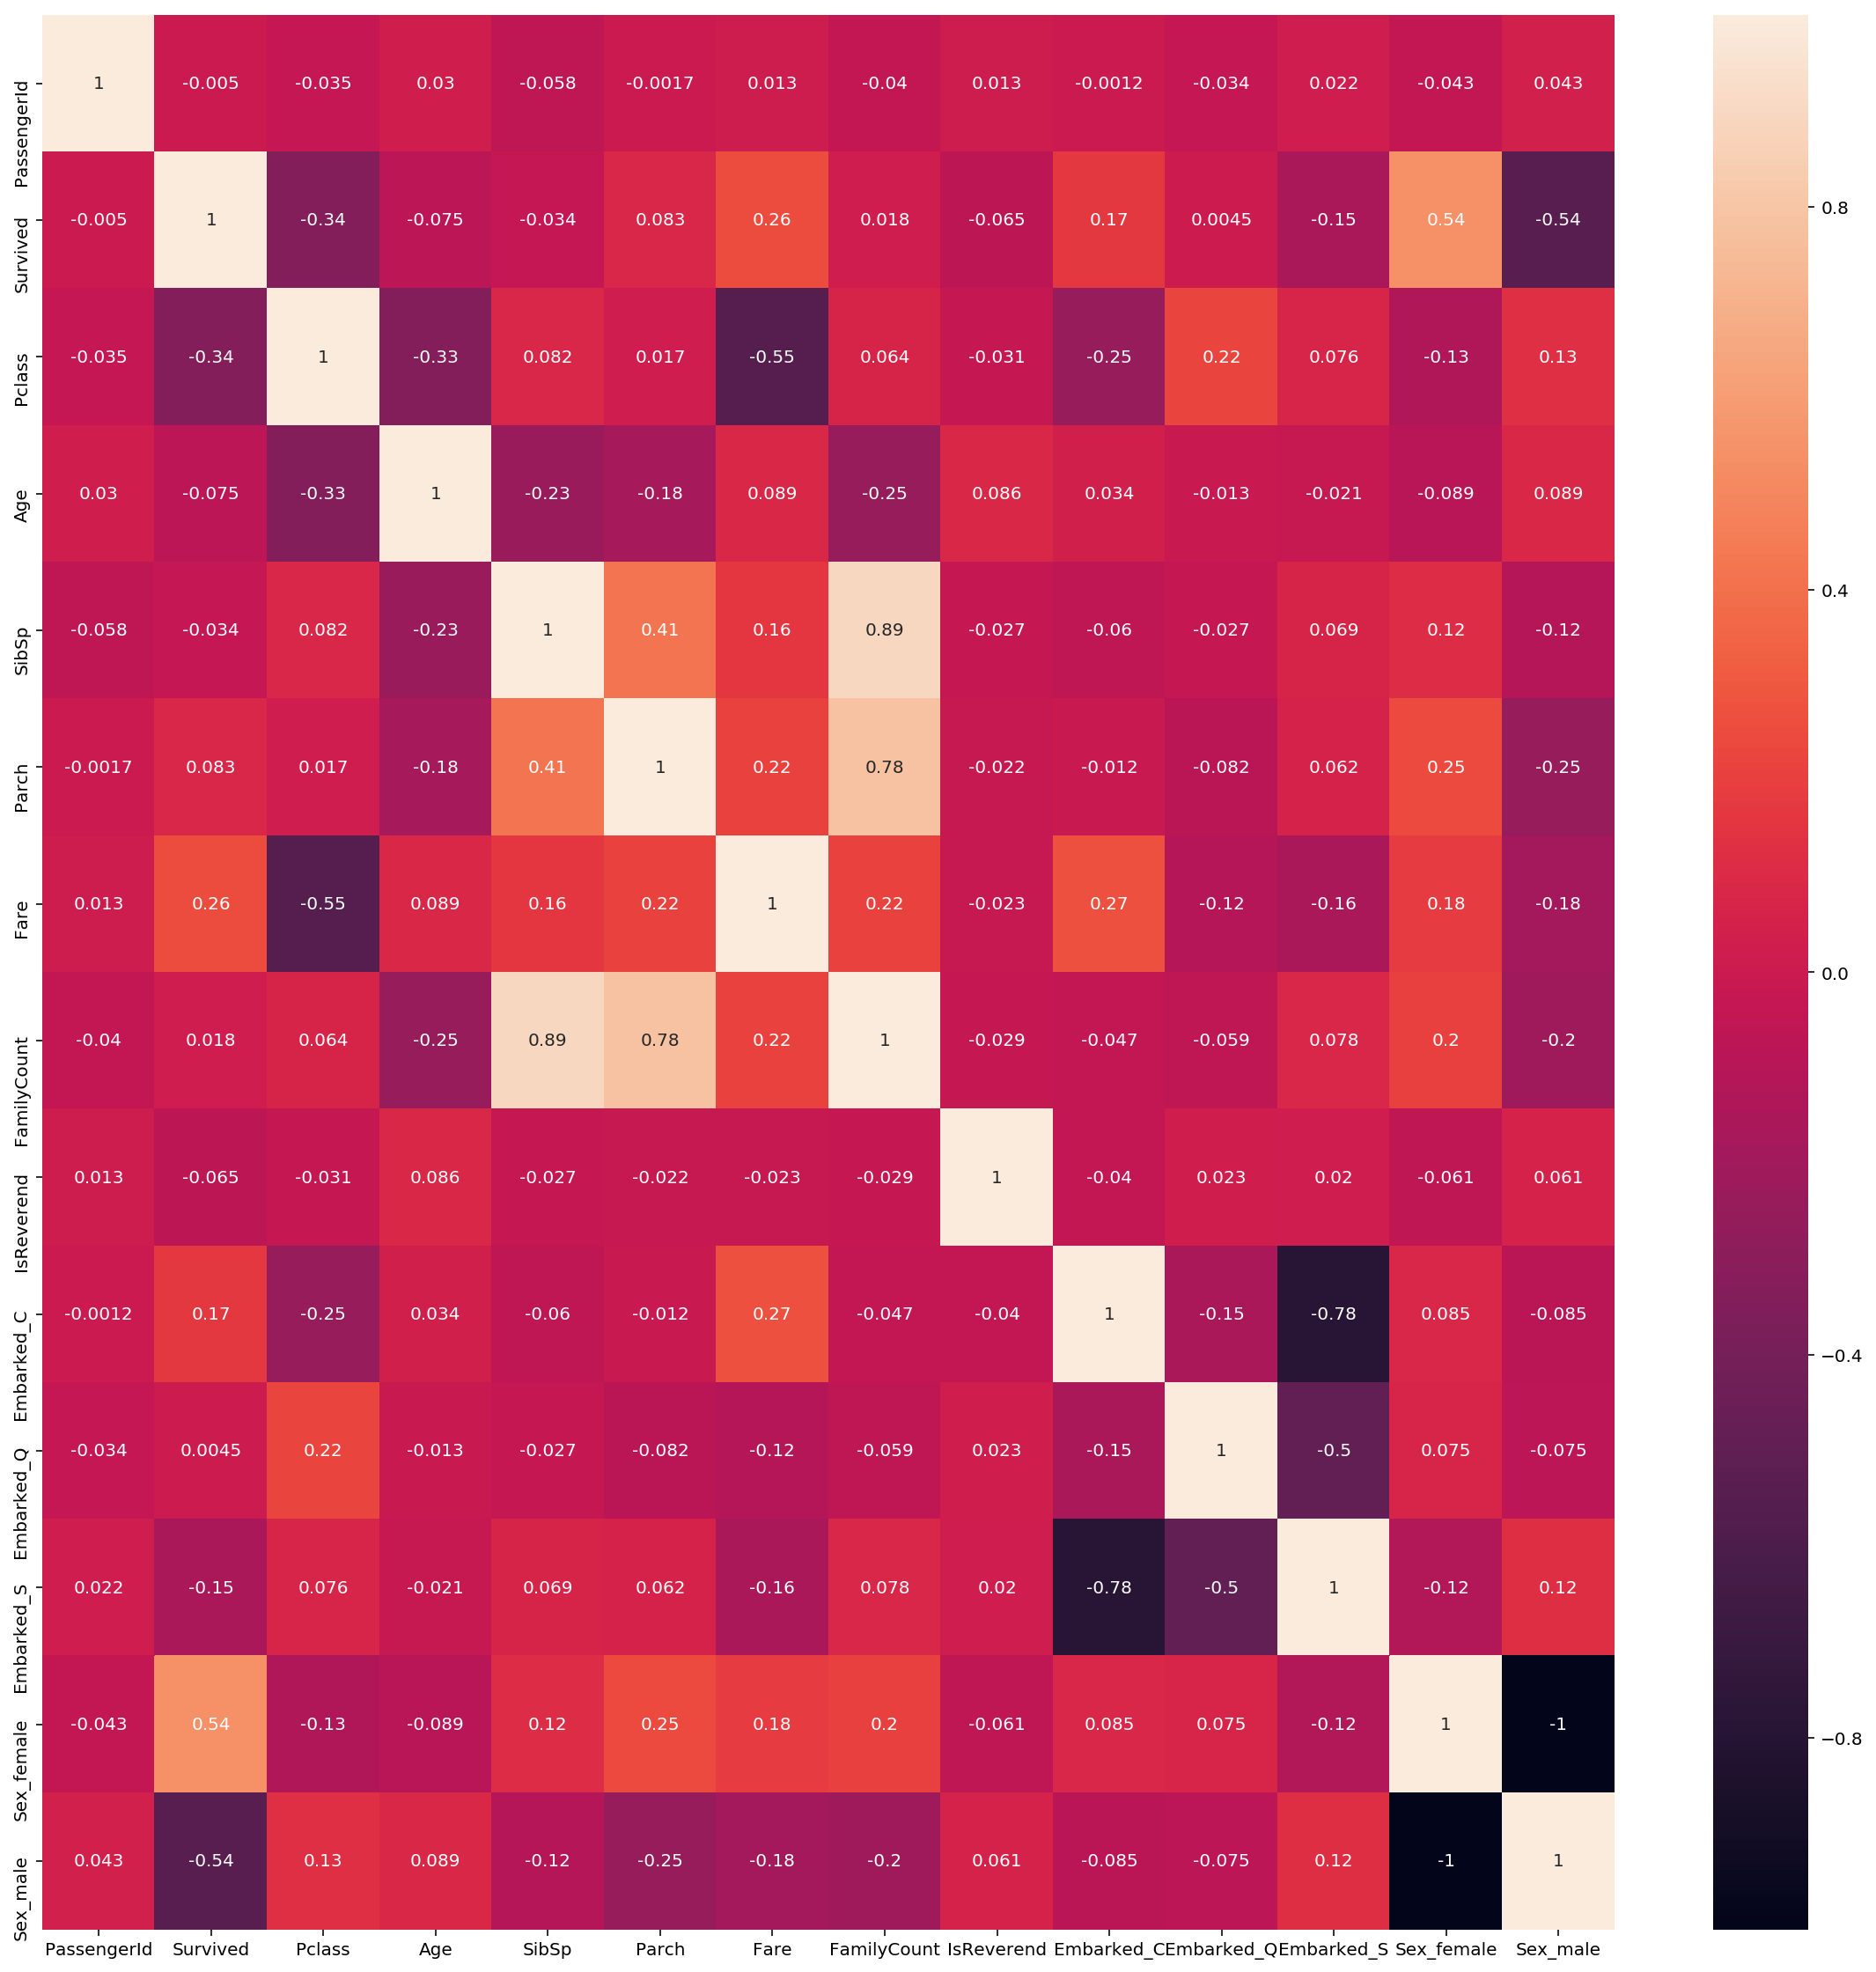

In [47]:
# below chart shows the correlations between variables
# not surprisingly, females had moderate positive correlation with survival
# while males had moderate negative correlation with survival
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True);

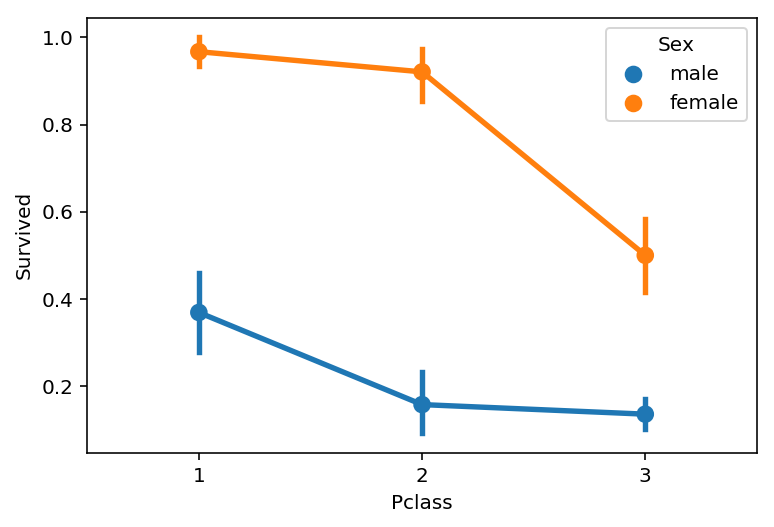

In [48]:
# shows the survival rate by gender by ticket class ('Pclass')
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train);

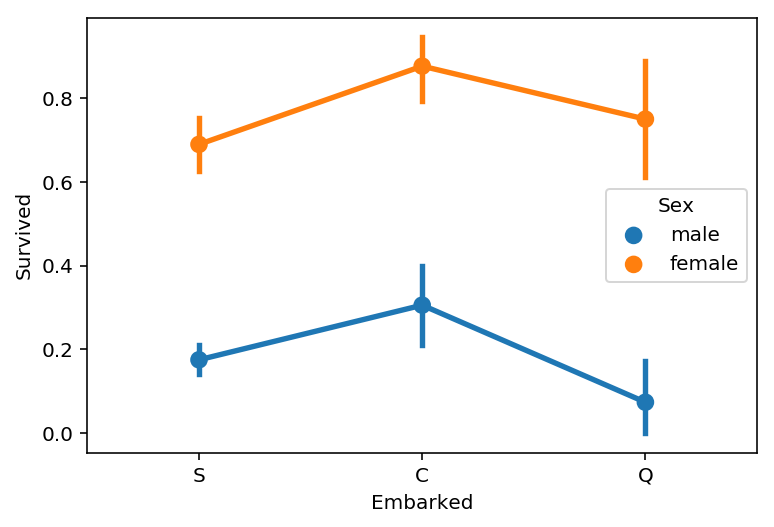

In [49]:
# shows the survival rate by gender by port of Embarkation
sns.pointplot(x='Embarked', y='Survived', hue='Sex', data=train);

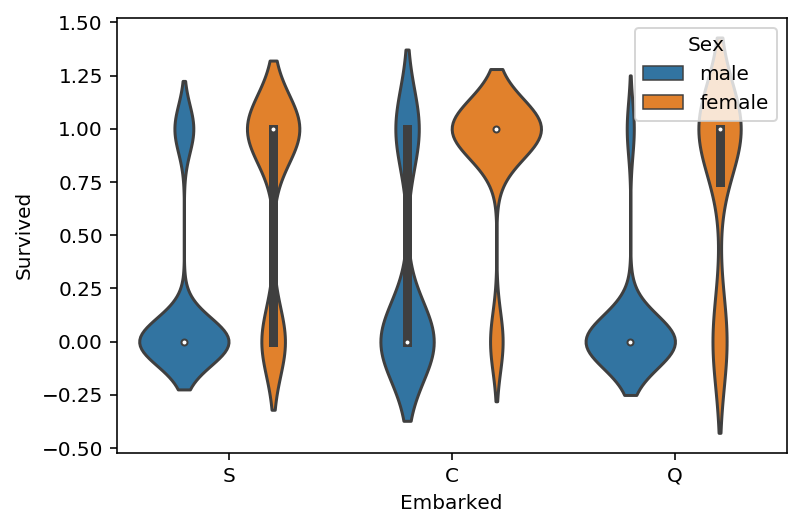

In [51]:
sns.violinplot(x='Embarked', y='Survived', hue='Sex', data=train);